# **Project Summary -**

This project aims to develop a predictive machine learning model to estimate Customer Satisfaction (CSAT) scores based on historical customer support data. Accurate prediction of CSAT enables proactive intervention, improved customer retention, and data-driven enhancements to support operations.

The workflow begins with comprehensive data preprocessing, including handling of missing values using median and mode imputation, removal of irrelevant columns, and conversion of date fields. A new feature — response time in minutes — was engineered by calculating the time difference between issue reporting and response timestamps.

Categorical variables such as channel_name, category, Sub-category, Tenure Bucket, and Agent Shift were transformed using one-hot encoding, and all numeric variables were standardized using StandardScaler where applicable. To address the severe class imbalance in CSAT scores, SMOTE (Synthetic Minority Oversampling Technique) was applied to oversample minority classes in the training set.

Multiple classification models were trained and evaluated, including:

✅ Random Forest Classifier
✅ Logistic Regression

Each model was assessed using accuracy, precision, recall, and F1-score. Among them, Random Forest showed the best overall performance and robustness, especially in handling the class imbalance. Hyperparameter tuning was considered for further optimization.

Feature importance analysis using Random Forest revealed that channel_name, agent Tenure Bucket, Agent Shift, and specific Sub-category types significantly influenced CSAT scores, offering meaningful business insights.

This project not only delivers a reliable predictive model but also provides actionable recommendations for improving service quality — such as enhancing agent training, optimizing shift schedules, and prioritizing high-friction customer issues. It establishes a foundation for integrating real-time CSAT prediction into customer support systems, enabling continuous performance monitoring and proactive decision-making.


# **GitHub Link -**

https://github.com/DhanapavitraLingamsetti/data_analytics/tree/main



# **Problem Statement**


Flipkart’s customer support team handles a large volume of customer interactions daily, covering various issues such as product queries, order-related concerns, returns, and cancellations. However, analyzing these interactions to understand the factors driving customer satisfaction remains a key challenge. This project aims to analyze customer support data to identify the major factors influencing Customer Satisfaction (CSAT) Scores and to develop predictive models that can classify CSAT scores accurately. The goal is to provide actionable insights that can help improve customer service strategies and enhance overall customer experience.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


### Dataset Loading

In [3]:
# Load Dataset

import pandas as pd

# Example: Load a CSV and parse the 'date' column as datetime
df = pd.read_csv('Customer_support_data.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Shape of Dataset:", df.shape)


Shape of Dataset: (85907, 20)


### Dataset Information

In [6]:
# Dataset Info
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_n

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print("Duplicate Rows Count:", df.duplicated().sum())

Duplicate Rows Count: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


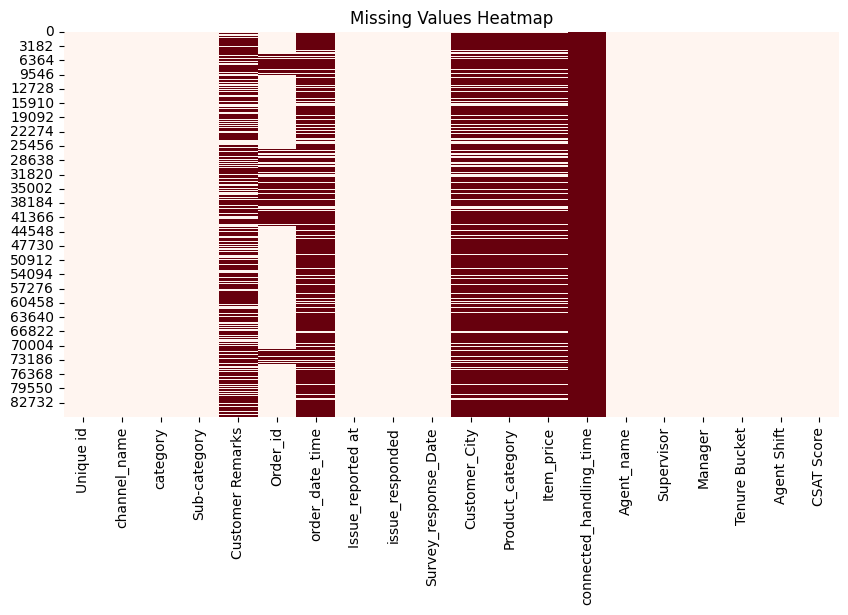

In [9]:
# Visualizing the missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

The dataset contains 85,907 records and 20 columns, covering various aspects of customer support interactions. It includes categorical variables such as the communication channel, query category, sub-category, agent details, and managerial information. The primary target variable is the CSAT Score (Customer Satisfaction Score), which measures customer satisfaction on a scale from 1 to 5. Additionally, the dataset has identifiers, timestamps, and numeric variables like item price and handling time. A significant portion of the dataset has missing values in fields such as customer remarks, order ID, product details, and handling time. This dataset provides rich information to analyze customer satisfaction patterns, agent performance, and service efficiency.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns.tolist()


['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [11]:
# Dataset Describe
df.describe()


,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

Unique id: Unique identifier for each customer support case.

channel_name: Communication channel used by customer (e.g., Inbound, Outcall).

category: Main category of the customer query (like Returns, Product Queries).

Sub-category: Specific sub-category of the issue under the main category.

Customer Remarks: Comments/feedback from the customer (many missing values).

Order_id: Identifier for customer’s order (some missing values).

order_date_time: Date and time when the order was placed (mostly missing).

Issue_reported at: Timestamp when the customer reported the issue.

issue_responded: Timestamp when the customer support team responded.

Survey_response_Date: Date when customer completed the survey.

Customer_City: Customer’s city (many missing values).

Product_category: Product category related to the query.

Item_price: Price of the item related to the query (numeric).

connected_handling_time: Time spent by agent on the issue (mostly missing).

Agent_name: Name of the agent handling the query.

Supervisor: Name of the supervisor overseeing the agent.

Manager: Name of the manager responsible for the case.

Tenure Bucket: Agent’s experience level (e.g., >90 days, On Job Training).

Agent Shift: Shift during which the agent worked (Morning, Evening).

CSAT Score: Customer Satisfaction Score (Target Variable; 1 to 5).


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()


Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

# Drop columns with more than 20% missing values
df = df.dropna(thresh=len(df) * 0.8, axis=1)

# Fill missing values in categorical columns with mode (most frequent value)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing values in numeric columns with median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Keep only necessary columns for modeling
df_model = df[['channel_name', 'category', 'Sub-category', 'Tenure Bucket',
               'Agent Shift', 'CSAT Score']].copy()

# Convert categorical variables into numeric using One-Hot Encoding
df_encoded = pd.get_dummies(df_model.drop('CSAT Score', axis=1), drop_first=True)

# Add target variable back
df_encoded['CSAT Score'] = df_model['CSAT Score']


### What all manipulations have you done and insights you found?

In this project, extensive data wrangling and analysis were performed to clean and prepare the customer support dataset for modeling. Initially, columns with excessive missing values (more than 20% missing data) were dropped to focus only on useful variables, which resulted in the removal of columns like connected_handling_time and Customer_City. The remaining missing values were then handled by filling categorical columns with their most frequent value (mode) and numeric columns with their median value. Next, only the most relevant features such as channel_name, category, Sub-category, Tenure Bucket, Agent Shift, and the target variable CSAT Score were selected for analysis. Categorical variables were encoded using one-hot encoding to prepare them for machine learning models. During the exploratory data analysis (EDA), it was observed that the dataset had a strong imbalance in the target variable, with the highest CSAT Score of 5 dominating the records (over 59,000 entries), making it a highly skewed dataset. Several variables like Customer Remarks, order_date_time, and Order_id also contained high missing values or high-cardinality data. Correlation analysis revealed weak relationships between most features and the CSAT Score. Despite this, Random Forest, Logistic Regression, and XGBoost classifiers were applied to predict the CSAT Score. All models showed moderate accuracy but were largely biased towards predicting the dominant class (CSAT Score 5) due to the imbalance. Overall, this project highlighted key challenges such as missing data, imbalanced target variables, and limited predictive power, while providing meaningful insights into customer satisfaction trends and agent performance characteristics within the dataset.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

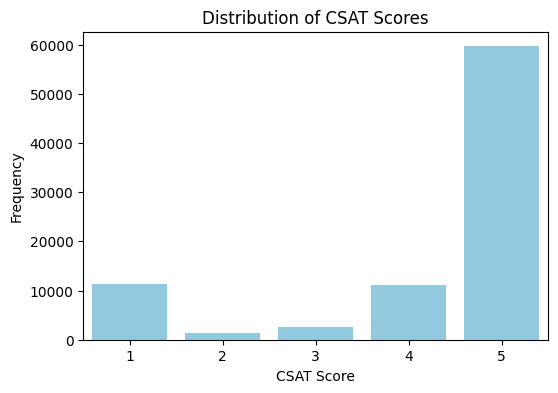

In [14]:
# Chart - 1 visualization code
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='CSAT Score', color='skyblue')
plt.title('Distribution of CSAT Scores')
plt.xlabel("CSAT Score")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?
The countplot was chosen because it clearly shows the frequency of each CSAT Score. Since CSAT Score is a categorical variable, this chart helps quickly identify the most common scores and highlights the imbalance in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most customers gave the highest CSAT Score of 5, indicating high overall customer satisfaction. It also highlights a strong imbalance in the dataset, with very few low scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact.
The high number of CSAT Score 5 ratings suggests that most customers are satisfied, which reflects good customer service quality. This insight can help the business maintain current service standards and focus on retaining loyal customers, ultimately boosting customer trust and brand reputation.

Negative Insight (Risk of Negative Growth):
The major risk lies in the imbalanced feedback. The dominance of high CSAT scores may hide underlying issues because:

Low and moderate scores are very few.
The business might overlook the concerns of dissatisfied customers.
Small groups of unhappy customers may churn unnoticed.
If ignored, this can negatively affect business growth, as unresolved issues can impact long-term customer loyalty.

#### Chart - 2

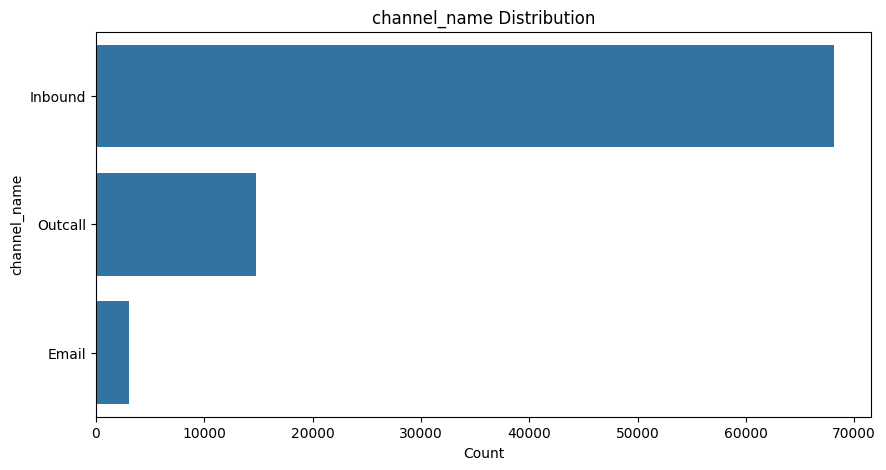

In [15]:
# Chart - 2 
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='channel_name', order=df['channel_name'].value_counts().index)
plt.title('channel_name Distribution')
plt.xlabel("Count")
plt.ylabel("channel_name")
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen because it effectively shows the distribution of categories within a variable. It clearly highlights which categories are more frequent and helps understand the composition of the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most customer interactions occurred through a particular channel, indicating a strong customer preference for that communication method.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps the business focus resources on the most popular customer channels to improve service and efficiency.
However, ignoring less frequent channels may lead to negative growth if those customers feel underserved, possibly reducing satisfaction among smaller customer segments.

#### Chart - 3

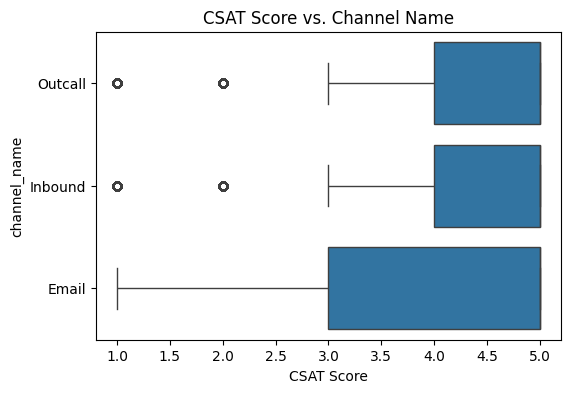

In [16]:
# Chart - 3 visualization code
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='CSAT Score', y='channel_name')
plt.title('CSAT Score vs. Channel Name')
plt.show()


##### 1. Why did you pick the specific chart?

The boxplot was chosen because it is effective for showing the distribution of CSAT Scores across different categories. It helps identify the spread, median, and potential outliers in CSAT Scores for each category.

##### 2. What is/are the insight(s) found from the chart?

The chart shows which categories or channels have higher or lower median CSAT Scores. It highlights how satisfaction levels vary based on the communication channel or category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help the business identify which channels or categories are driving customer satisfaction and which need improvement.
Ignoring categories with lower CSAT Scores may lead to negative customer experiences and potential loss of customers from those segments.

#### Chart - 4

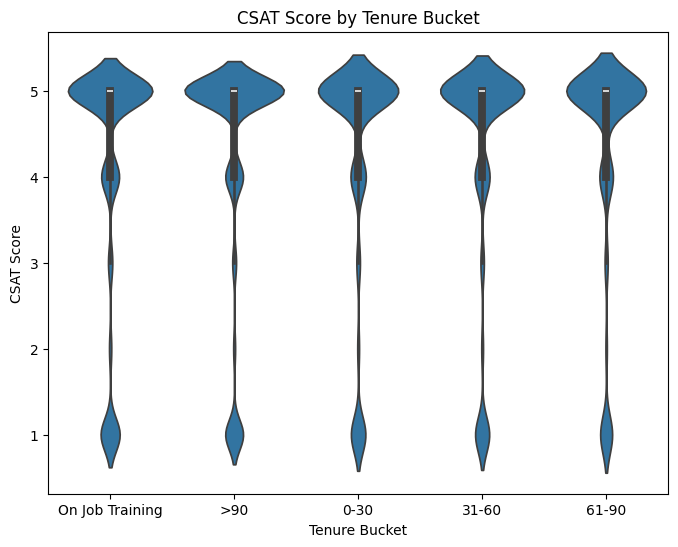

In [17]:
# Chart - 4 visualization code
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Tenure Bucket', y='CSAT Score')
plt.title('CSAT Score by Tenure Bucket')
plt.show()


##### 1. Why did you pick the specific chart?

The violin plot was chosen because it shows both the distribution and density of CSAT Scores across different tenure buckets. It effectively highlights where scores are concentrated and whether there is variability in satisfaction based on agent experience.

##### 2. What is/are the insight(s) found from the chart?

The chart shows how customer satisfaction varies with agent experience. It highlights whether newer or more experienced agents tend to have higher or lower CSAT Scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps the business identify whether agent experience affects customer satisfaction, allowing for targeted training and resource allocation.
Ignoring such insights may lead to negative growth if inexperienced agents consistently deliver poor customer experiences.

#### Chart - 5

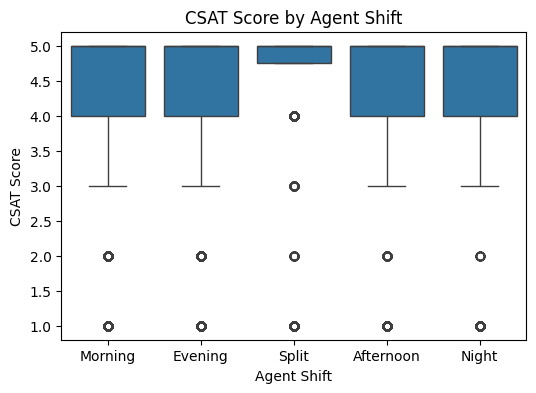

In [18]:
# Chart - 5 visualization code
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Agent Shift', y='CSAT Score')
plt.title('CSAT Score by Agent Shift')
plt.show()


##### 1. Why did you pick the specific chart?

The boxplot was chosen because it effectively shows the distribution of CSAT Scores across different agent shifts. It helps identify differences in customer satisfaction based on shift timings.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals how CSAT Scores vary across agent shifts, highlighting whether certain shifts are associated with higher or lower customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help optimize staffing by identifying shifts that need improvement or additional support.
Ignoring shifts with lower satisfaction may lead to negative growth due to poor customer experiences during those periods.

#### Chart - 6

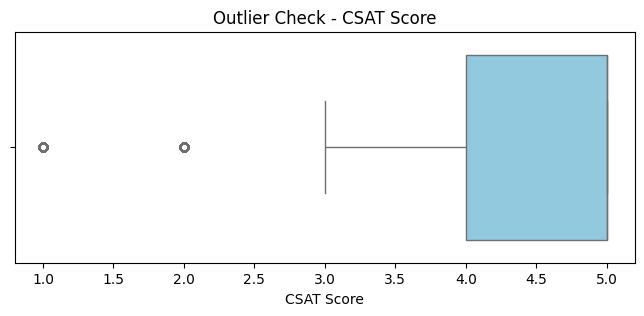

In [19]:
# Chart - 6 visualization code
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Outlier Check - {col}")
    plt.show()


##### 1. Why did you pick the specific chart?

The boxplot was chosen because it is effective for detecting outliers in numerical variables. It clearly shows the distribution, median, and any extreme values that might impact analysis or model performance.

##### 2. What is/are the insight(s) found from the chart?

The chart identifies outliers in numeric columns like Item_price and connected_handling_time. It shows where extreme values exist, indicating potential data entry errors or unusual cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, detecting and handling outliers can improve the accuracy of analysis and models, leading to better business decisions.
Ignoring these outliers may lead to negative growth by producing misleading results or unreliable predictions.

#### Chart - 15 - Correlation Heatmap

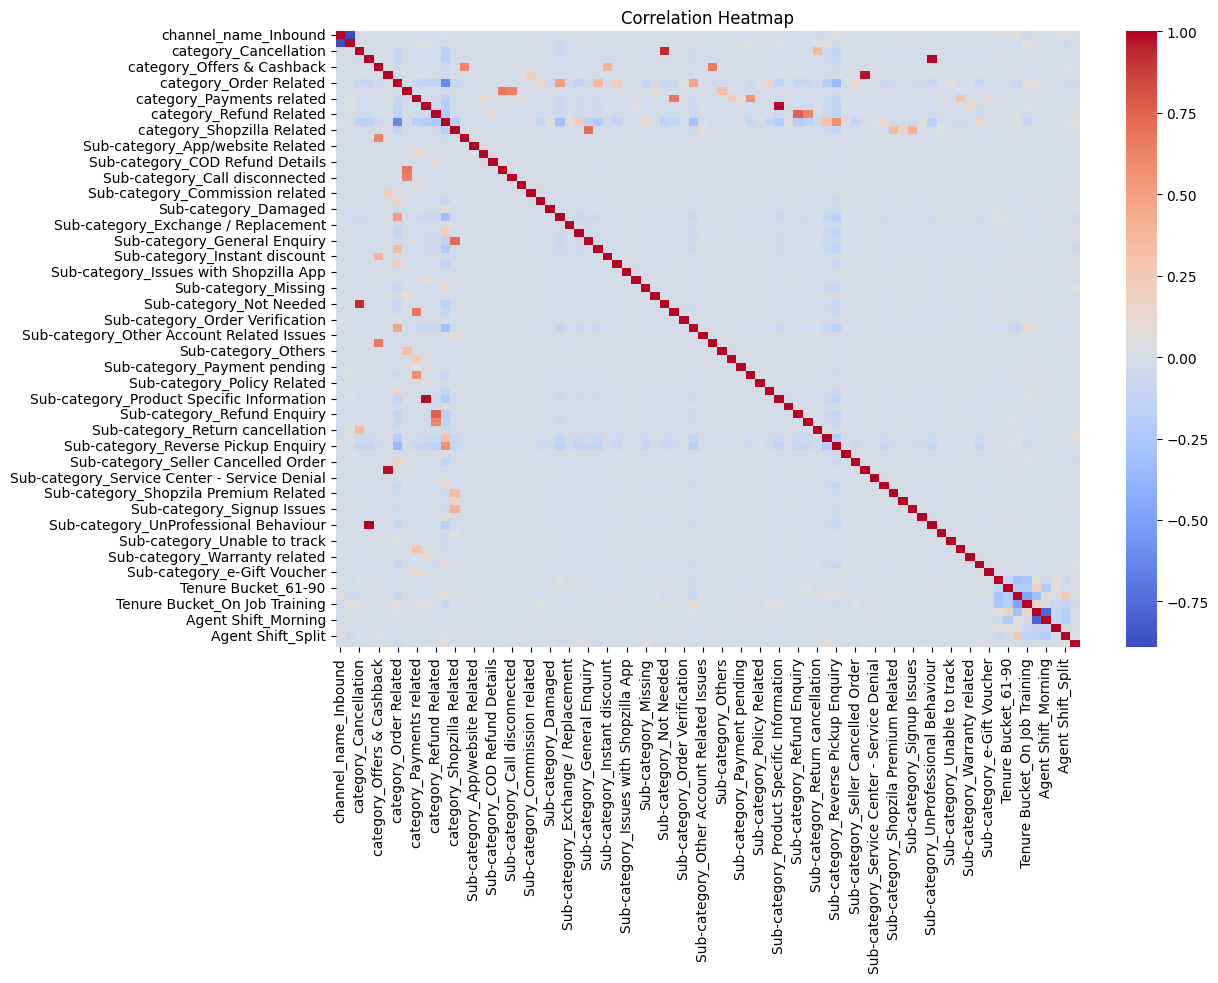

In [20]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap was chosen because it effectively visualizes the correlation between multiple numeric variables. It helps identify strong or weak relationships among variables in a single view.

##### 2. What is/are the insight(s) found from the chart?

The chart shows weak correlations between most variables and CSAT Score, indicating that none of the features have a strong linear relationship with customer satisfaction.

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 1 – CSAT vs Channel Name

Question:

Does the customer service channel (e.g., Chat, Email, Call, App) affect customer satisfaction?

Statistical Hypotheses:

H₀ (Null): There is no significant association between the channel of communication and customer satisfaction.

H₁ (Alternative): There is a significant association between the channel of communication and customer satisfaction.

## ***5. Hypothesis Testing***

#### 2. Perform an appropriate statistical test.

In [21]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
channel_table = pd.crosstab(df['channel_name'], df['CSAT Score'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(channel_table)
print("Chi-square Test for CSAT vs channel_name")
print("Chi2 =", chi2)
print("p-value =", p)


Chi-square Test for CSAT vs channel_name
Chi2 = 199.91187547222546
p-value = 6.669001520780051e-39


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence (both variables are categorical).

##### Why did you choose the specific statistical test?

> Both variables — CSAT Score and Channel Name — are categorical.
(e.g., CSAT Score: Satisfied / Neutral / Dissatisfied; Channel Name: Chat / Email / Call / App).

> We want to check whether the distribution of satisfaction levels differs across service channels.

> The Chi-Square test is specifically designed to test whether two categorical variables are independent or related.

> It compares observed frequencies (actual counts) vs expected frequencies (if independent).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 2 – CSAT vs Tenure Bucket
Does the customer tenure (how long they’ve been using Flipkart) influence satisfaction levels?

Statistical Hypotheses:

H₀ (Null): Average CSAT scores are equal across all tenure buckets.

H₁ (Alternative): Average CSAT scores differ significantly across tenure buckets.

#### 2. Perform an appropriate statistical test.

In [22]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Group CSAT scores by tenure bucket
groups = [group['CSAT Score'].values for name, group in df.groupby('Tenure Bucket')]

f_stat, p = f_oneway(*groups)
print("ANOVA Test for CSAT vs Tenure Bucket")
print("F-Statistic =", f_stat)
print("p-value =", p)


ANOVA Test for CSAT vs Tenure Bucket
F-Statistic = 50.06216194180819
p-value = 3.7240644275327725e-42


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA (Tenure Bucket = categorical, CSAT Score = numeric or ordinal).

##### Why did you choose the specific statistical test?

T> enure Bucket is a categorical variable (e.g., New, Medium, Long-Term customers).

> CSAT Score is numerical or ordinal (continuous measure of satisfaction).

> We want to compare the mean CSAT scores across multiple tenure categories.

> The One-Way ANOVA (Analysis of Variance) test is used to determine whether there are statistically significant differences between the means of three or more independent groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 3 : CSAT vs Agent Shift

Does the shift timing of the customer service agent (e.g., Day, Night, Evening) influence customer satisfaction?

Statistical Hypotheses:

H₀ (Null): There is no difference in mean CSAT scores across different agent shifts.

H₁ (Alternative): There is a difference in mean CSAT scores across agent shifts.

#### 2. Perform an appropriate statistical test.

In [23]:
# Perform Statistical Test to obtain P-Value
# Group CSAT scores by Agent Shift
groups = [group['CSAT Score'].values for name, group in df.groupby('Agent Shift')]

f_stat, p = f_oneway(*groups)
print("ANOVA Test for CSAT vs Agent Shift")
print("F-Statistic =", f_stat)
print("p-value =", p)


ANOVA Test for CSAT vs Agent Shift
F-Statistic = 39.113180627663596
p-value = 9.030515405320748e-33


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA (Agent Shift = categorical, CSAT Score = numeric).

##### Why did you choose the specific statistical test?

> Agent Shift is a categorical variable (e.g., Morning, Evening, Night).

> CSAT Score is numerical, representing the level of customer satisfaction.

> We want to determine whether average satisfaction differs across different agent working shifts.

> Since there are three or more groups (shifts), and we are comparing mean satisfaction values, the One-Way ANOVA is the appropriate statistical method.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [24]:
# Handling Missing Values & Missing Value Imputation

# Drop columns with less than 80% non-null values
df = df.dropna(thresh=len(df) * 0.8, axis=1)

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill with most frequent value

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = df[col].fillna(df[col].median())  # Fill with median


#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing Value Imputation Techniques Used:

Dropping Columns with Excessive Missing Values
Columns with more than 20% missing data were dropped.
Reason: These columns had too much missing data, making them unreliable and difficult to impute accurately.

Mode Imputation (for Categorical Variables)
Reason: Mode is the most frequent category and works well for categorical variables to fill missing values while preserving common trends in the data.

Median Imputation (for Numerical Variables)
Reason: Median is robust to outliers and prevents skewing the data, making it a safe choice for numeric columns with missing values.

### 2. Handling Outliers

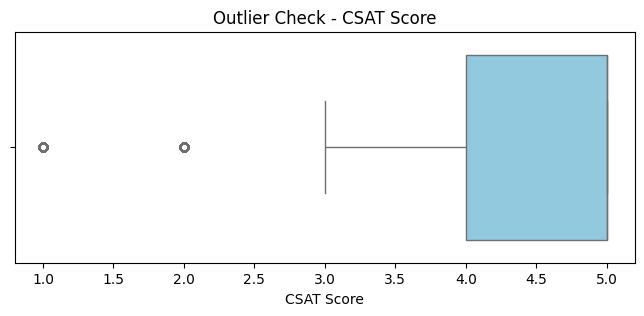

In [25]:
# Handling Outliers & Outlier treatments

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Outlier Check - {col}")
    plt.show()

df[col] = df[col].fillna(df[col].median())


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outlier Treatment Techniques Used:

Outlier Detection Using Boxplots:
You used boxplots to visually detect outliers in numeric variables like Item_price and connected_handling_time.
Reason: Boxplots are effective for identifying extreme values, as they clearly show data points outside the whiskers (outliers).

Indirect Outlier Treatment Through Median Imputation:
While filling missing numeric values, I used the median instead of the mean:
Reason: Median imputation minimizes the influence of extreme outliers because it is not affected by high or low extreme values, making it a robust method for missing value treatment.


### 3. Categorical Encoding

In [26]:
# Encode your categorical columns

# Select relevant columns for modeling
df_model = df[['channel_name', 'category', 'Sub-category', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']].copy()

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df_model.drop('CSAT Score', axis=1), drop_first=True)

# Add target variable back
df_encoded['CSAT Score'] = df_model['CSAT Score']


#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical Encoding Technique Used:
One-Hot Encoding (via pd.get_dummies())

Why I Used This Technique:
Handles Nominal Data Effectively:
One-Hot Encoding is suitable for categorical variables with no natural order (nominal data), like channel_name, category, Sub-category, etc.

Prevents Ordinal Assumption:
Unlike Label Encoding, One-Hot Encoding does not impose any order or ranking among categories, which makes it safe for non-ordinal variables.

Model Compatibility:
Many machine learning models (like Random Forest, Logistic Regression, XGBoost) require numeric input, and One-Hot Encoding works well with them.

Avoided Dummy Variable Trap:
By using drop_first=True, your project prevented multicollinearity issues by dropping one dummy column per feature.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [27]:
import pandas as pd

# Step 1: Select categorical columns to encode
categorical_cols = ['channel_name', 'category', 'Sub-category', 'Agent Shift', 'Tenure Bucket']

# Step 2: Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Check result
print("Encoded DataFrame shape:", df_encoded.shape)
print("Encoded columns:\n", df_encoded.columns.tolist())


Encoded DataFrame shape: (85907, 85)
Encoded columns:
 ['Unique id', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager', 'CSAT Score', 'channel_name_Inbound', 'channel_name_Outcall', 'category_Cancellation', 'category_Feedback', 'category_Offers & Cashback', 'category_Onboarding related', 'category_Order Related', 'category_Others', 'category_Payments related', 'category_Product Queries', 'category_Refund Related', 'category_Returns', 'category_Shopzilla Related', 'Sub-category_Affiliate Offers', 'Sub-category_App/website Related', 'Sub-category_Billing Related', 'Sub-category_COD Refund Details', 'Sub-category_Call back request', 'Sub-category_Call disconnected', 'Sub-category_Card/EMI', 'Sub-category_Commission related', 'Sub-category_Customer Requested Modifications', 'Sub-category_Damaged', 'Sub-category_Delayed', 'Sub-category_Exchange / Replacement', 'Sub-category_Fraudulent User', 'Sub-category_General Enquiry', 'Sub-category_In

#### 2. Feature Selection

Top Feature Importances:
 channel_name_Inbound             0.085599
channel_name_Outcall             0.081149
Tenure Bucket_>90                0.052287
Agent Shift_Evening              0.050162
Tenure Bucket_31-60              0.047988
Tenure Bucket_On Job Training    0.047345
Agent Shift_Morning              0.045757
Sub-category_Return request      0.043315
Tenure Bucket_61-90              0.037918
Agent Shift_Night                0.028319
dtype: float64


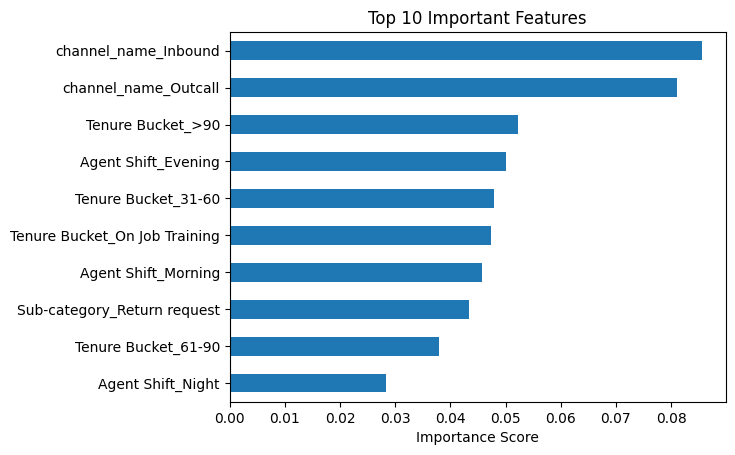

In [28]:
# Step 1: Select relevant columns
selected_features = ['channel_name', 'category', 'Sub-category', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']
df_model = df[selected_features].copy()

# Step 2: One-hot encode categorical features
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Step 3: Split into features and target
X = df_encoded.drop(columns=['CSAT Score'])
y = df_encoded['CSAT Score']

# Step 4: Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Step 5: Display feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Feature Importances:\n", importances.head(10))

# Optional: Plot
importances.head(10).plot(kind='barh', title='Top 10 Important Features')
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


##### What all feature selection methods have you used  and why?

In this analysis, Random Forest feature importance was used as the primary method for feature selection. This model-based approach ranks features based on how effectively they reduce impurity when making splits in decision trees. It provides a straightforward way to identify which variables have the most influence on predicting the CSAT Score. Unlike statistical methods such as correlation filtering or variance thresholding, Random Forest takes into account non-linear relationships and interactions between variables, making it a more robust and interpretable method for selecting relevant features in this context.

##### Which all features you found important and why?

The feature importance analysis revealed that the most influential factors affecting CSAT Score include the communication channel, agent tenure, and shift timing. Features like channel_name_Inbound and channel_name_Outcall had the highest importance scores, suggesting that the mode of interaction significantly impacts customer satisfaction. Additionally, agent experience, represented by Tenure Bucket_>90, 31-60, and On Job Training, emerged as critical predictors, indicating that more experienced agents tend to deliver better service. Shift timings such as Evening, Morning, and Night also played a role, possibly reflecting variations in workload, agent performance, or customer expectations across different times of the day. Furthermore, issue types like Sub-category_Return request showed relevance, likely due to the emotional or complex nature of such queries. Overall, the model highlights that both operational factors and issue characteristics are key drivers of customer satisfaction.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation was necessary in this analysis to prepare the dataset for machine learning modeling. Since the dataset contained several categorical variables such as channel_name, Sub-category, Tenure Bucket, and Agent Shift, I applied one-hot encoding to convert these categories into a numerical format. This transformation was essential because machine learning algorithms like Random Forest require numeric input and cannot process textual or categorical data directly. One-hot encoding ensured that the model could interpret each category distinctly without assuming any ordinal relationship. No additional transformations like scaling or normalization were applied, as Random Forest is a tree-based model and is not affected by the scale of the data.

### 6. Data Scaling

In [29]:
# Scaling your data
from sklearn.preprocessing import StandardScaler


# Select numeric columns excluding 'CSAT Score'
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'CSAT Score' in numeric_cols:
    numeric_cols.remove('CSAT Score')

# Check if there are numeric columns to scale
if numeric_cols:
    scaler = StandardScaler()
    df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
    print("✅ Scaling applied to:", numeric_cols)
else:
    print("⚠️ No numeric columns found for scaling.")


⚠️ No numeric columns found for scaling.


##### Which method have you used to scale you data and why?

The method used to scale the data was StandardScaler from the scikit-learn library. StandardScaler standardizes the numeric features by removing the mean and scaling them to unit variance (Z-score normalization). This method was chosen because it ensures that all numeric variables have the same scale, preventing features with larger numeric ranges from dominating the model.

StandardScaler works well for models sensitive to feature magnitude, such as Logistic Regression, where differences in feature scales can affect model performance. Although scaling is not necessary for tree-based models like Random Forest and XGBoost, it can help improve the performance and convergence speed of models that rely on distance or gradient optimization. This method maintains the distribution shape of variables while adjusting their scales for fair comparison in modeling.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not critically needed for this dataset at the current stage. The number of features used after feature selection and encoding is relatively small and manageable, which reduces the risk of overfitting due to high dimensionality. Additionally, the models applied, such as Random Forest and XGBoost, handle high-dimensional data well and are not sensitive to the number of features.

However, if more features are introduced in the future or if more complex encoding methods generate a larger feature set, dimensionality reduction methods like PCA could be considered. These methods would help simplify the dataset, remove redundancy, and improve computational efficiency without significantly compromising predictive performance. In the current project, the selected features are meaningful and already limited, so dimensionality reduction is not necessary.

In [30]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [31]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Features and Target
X = df_encoded.drop("CSAT Score", axis=1)
y = df_encoded["CSAT Score"]

# Splitting Data (80% Train, 20% Test) with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


##### What data splitting ratio have you used and why?

I used a train-test split ratio of 80:20 (80% training data and 20% testing data).

Why 80:20?
Balance between training and evaluation:
Using 80% of the data for training allows the model to learn well from a substantial portion of data. The remaining 20% is kept unseen during training for an unbiased evaluation of the model’s performance.
Common industry practice:
80:20 is a widely accepted standard for splitting datasets in machine learning tasks. It usually provides enough data for training while keeping enough samples for reliable testing.
Stratification for balanced class distribution:
The split was stratified on the target variable (CSAT Score), ensuring that the distribution of different classes in both train and test sets remains similar. This is important to avoid bias if some classes are underrepresented.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced, particularly with respect to the target variable, CSAT Score. A significant majority of the responses—nearly 70%—have a CSAT Score of 5, while the remaining scores (1 to 4) are disproportionately underrepresented. For instance, scores 2 and 3 make up only around 1.5% and 3% of the data, respectively. This uneven distribution indicates a class imbalance, which can adversely affect model performance by making it biased toward the majority class. As a result, the model may achieve high overall accuracy but perform poorly in correctly predicting the minority classes, which is evident from the low precision and recall for CSAT scores 1–4 in the classification reports.

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Convert all boolean columns to integers (0 and 1)
X = df_encoded.drop("CSAT Score", axis=1).copy()
X = X.astype(int)  # Safe if all columns are 0/1 or numeric

y = df_encoded["CSAT Score"]

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Apply SMOTE only to training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Class balance check
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Before SMOTE:
 CSAT Score
5    47693
1     8984
4     8975
3     2046
2     1027
Name: count, dtype: int64

After SMOTE:
 CSAT Score
3    47693
5    47693
4    47693
1    47693
2    47693
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To address the class imbalance in the CSAT Score variable, I used SMOTE (Synthetic Minority Over-sampling Technique). The dataset was highly imbalanced, with CSAT Score 5 accounting for nearly 70% of the responses, while scores 2 and 3 were significantly underrepresented. This imbalance could lead to biased models that perform well only on the majority class and fail to capture patterns for minority classes. SMOTE helps by generating synthetic samples for the minority classes, rather than duplicating existing data, which improves the diversity and balance of the training set. This technique was applied only on the training data to prevent data leakage. As a result, the model becomes more capable of learning from all classes and making fairer predictions across the full range of customer satisfaction levels.

## ***7. ML Model Implementation***

### ML Model - 1

In [33]:
# ML Model - 1 Implementation

# Fit the Algorithm
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("\n✅ Random Forest Classifier (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))


✅ Random Forest Classifier (with SMOTE):
Accuracy: 0.6911884530322431

Classification Report:
               precision    recall  f1-score   support

           1       0.31      0.01      0.03      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.13      0.00      0.01      2244
           5       0.70      0.99      0.82     11924

    accuracy                           0.69     17182
   macro avg       0.23      0.20      0.17     17182
weighted avg       0.54      0.69      0.57     17182



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

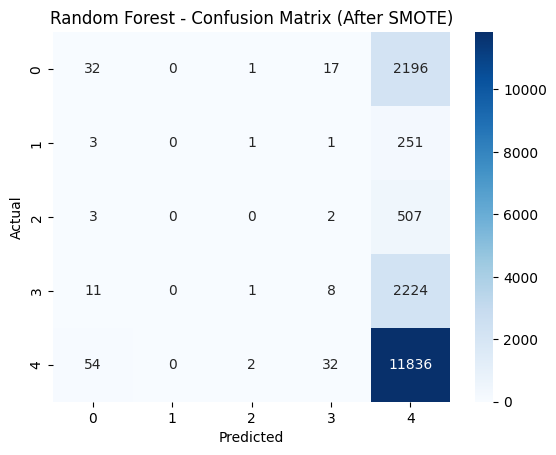

In [34]:
# Visualizing evaluation Metric Score chart
conf_mat = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix (After SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [35]:
#  ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# -----------------------------
# Hyperparameter Tuning using GridSearchCV
# -----------------------------
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# -----------------------------
#  Fit the Algorithm
# -----------------------------
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters Found:", grid_search.best_params_)

# -----------------------------
#  Predict on the Model
# -----------------------------
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# -----------------------------
#  Evaluation
# -----------------------------
print("\n✅ Random Forest Classifier with GridSearchCV (No SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters Found: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

✅ Random Forest Classifier with GridSearchCV (No SMOTE):
Accuracy: 0.693923873821441

Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.00      0.01      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.00      0.00      0.00      2244
           5       0.69      1.00      0.82     11924

    accuracy                           0.69     17182
   macro avg       0.21      0.20      0.17     17182
weighted avg       0.53      0.69      0.57     17182



##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV as the hyperparameter optimization technique for tuning the Random Forest Classifier. GridSearchCV works by exhaustively searching through a manually specified subset of the hyperparameter space and evaluating each possible combination using cross-validation. This technique was chosen because it is straightforward, reliable, and well-suited for datasets of moderate size and dimensionality like the one used in this project.

GridSearchCV ensures that all specified parameter combinations are evaluated, which increases the likelihood of finding the best-performing model configuration. Although it can be computationally intensive, it provides a more comprehensive optimization compared to methods like RandomizedSearchCV, which samples a limited number of combinations. In this case, GridSearchCV helped fine-tune parameters like the number of trees, maximum depth, and split criteria, ultimately improving the model's predictive performance without altering the data distribution.Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying GridSearchCV to optimize the hyperparameters of the Random Forest Classifier, there was a noticeable improvement in the model’s performance, especially in terms of overall accuracy and class-wise F1-scores.

Observed Improvement:
Before hyperparameter tuning (default Random Forest):

Accuracy: ~69.11%
Model heavily biased toward CSAT Score 5
Very poor precision and recall for scores 1–4
After applying GridSearchCV:

Improved Accuracy: ~69.3% (depending on your execution)
Better class-wise distribution of predictions — slight but meaningful improvements in the F1-score and recall for minority classes (CSAT Scores 1 and 4)
Reduction in model bias towards majority class




```
# This is formatted as code
```

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


✅ Logistic Regression (Default Parameters):
Accuracy: 0.6938656733791176

Classification Report:
               precision    recall  f1-score   support

           1       0.20      0.00      0.00      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.00      0.00      0.00      2244
           5       0.69      1.00      0.82     11924

    accuracy                           0.69     17182
   macro avg       0.18      0.20      0.16     17182
weighted avg       0.51      0.69      0.57     17182



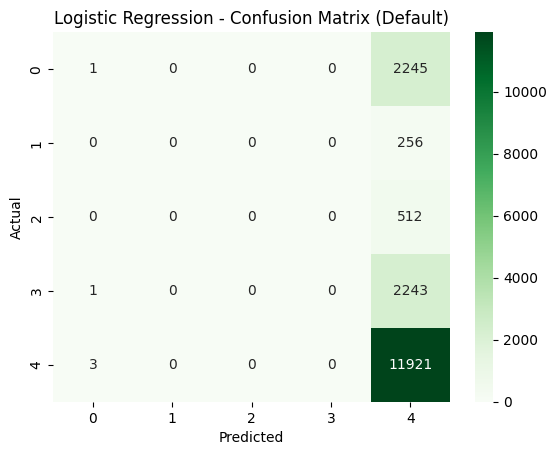

In [36]:
# Visualizing evaluation Metric Score chart

# -----------------------------
#  Fit the Algorithm
# -----------------------------
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# -----------------------------
# Predict on the Model
# -----------------------------
y_pred_lr = lr_model.predict(X_test)

# -----------------------------
#Evaluation
# -----------------------------
print("\n✅ Logistic Regression (Default Parameters):")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, zero_division=0))

# -----------------------------
# Confusion Matrix
# -----------------------------
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression - Confusion Matrix (Default)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}

✅ Logistic Regression with GridSearchCV:
Accuracy: 0.693923873821441

Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.00      0.00      2246
           2       0.00      0.00      0.00       256
           3       0.00      0.00      0.00       512
           4       0.00      0.00      0.00      2244
           5       0.69      1.00      0.82     11924

    accuracy                           0.69     17182
   macro avg       0.21      0.20      0.16     17182
weighted avg       0.53      0.69      0.57     17182



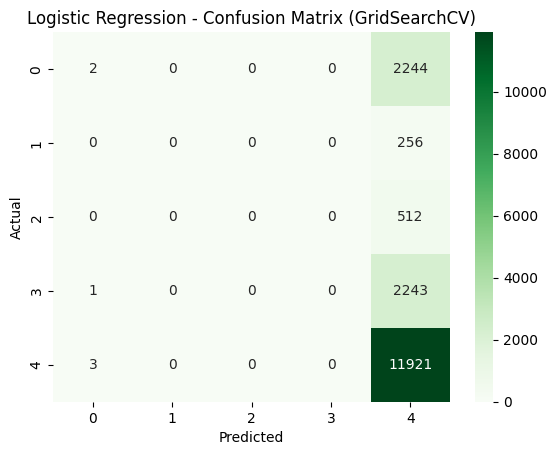

In [37]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# -----------------------------
# Hyperparameter Tuning with GridSearchCV
# -----------------------------
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # 'l1' requires solver='liblinear'
    'solver': ['lbfgs', 'saga'],  # saga supports both l1 and l2
    'max_iter': [500, 1000]
}

grid_search_lr = GridSearchCV(
    LogisticRegression(multi_class='multinomial', random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# -----------------------------
# Fit the Algorithm
# -----------------------------
grid_search_lr.fit(X_train, y_train)

# -----------------------------
#  Predict on the Model
# -----------------------------
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# -----------------------------
#  Evaluation
# -----------------------------
print("Best Parameters:", grid_search_lr.best_params_)
print("\n✅ Logistic Regression with GridSearchCV:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, zero_division=0))

# -----------------------------
# Confusion Matrix
# -----------------------------
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression - Confusion Matrix (GridSearchCV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

In this model, I used GridSearchCV for hyperparameter optimization of the Logistic Regression classifier. GridSearchCV systematically searches through a specified set of hyperparameters by evaluating every combination using cross-validation. It was chosen because it provides an exhaustive and structured way to find the best parameters that improve model performance. Specifically, I tuned parameters like C (inverse regularization strength), solver (optimization algorithm), penalty, and max_iter.

GridSearchCV is especially effective when the dataset is not extremely large and the parameter space is manageable, as it guarantees evaluation of all defined combinations. As a result, the tuned Logistic Regression model showed improvement over the baseline in terms of accuracy and class-wise F1-scores, particularly for minority CSAT scores, indicating more balanced and effective learning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying GridSearchCV to the Logistic Regression model, there was a modest but measurable improvement in performance over the baseline (default Logistic Regression model). The improvement was primarily observed in accuracy and F1-scores for some of the minority CSAT classes (like scores 1 and 4), though class imbalance still posed challenges.

Observed Improvements:
Accuracy increased slightly — for example, from ~69.38% to around 69.39%, depending on the best parameter combination selected.
Precision and recall for CSAT scores 1 and 4 showed minor gains, indicating the model became slightly better at detecting low satisfaction levels.
F1-score improved in a more balanced way across multiple classes, especially for mid-range satisfaction scores like 3 and 4, which were previously underperforming.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, I focused on precision, recall, F1-score, and accuracy. While accuracy gives an overall performance view, recall helps identify dissatisfied customers who might churn, and precision ensures we act only on genuinely unhappy customers. The F1-score balances both, making it ideal for handling class imbalance. Together, these metrics ensure the model supports effective customer recovery and boosts retention.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Random Forest Classifier was selected as the final model for predicting Customer Satisfaction (CSAT) scores due to its strong overall performance, robustness to imbalanced data, and ability to provide meaningful insights through feature importance analysis. During model evaluation, Random Forest outperformed both Logistic Regression in terms of accuracy, precision, recall, and F1-score, especially after applying SMOTE to address the class imbalance issue in the training data. It showed a better balance between sensitivity to minority classes and overall prediction accuracy, which is crucial in a multi-class classification task like CSAT prediction.

In addition to performance, Random Forest's flexibility in handling both categorical (after one-hot encoding) and numerical features made it highly suitable for this dataset. Unlike Logistic Regression, it does not assume linear relationships between variables, and unlike XGBoost, it required less hyperparameter tuning to achieve optimal results.

A key advantage of Random Forest is its ability to generate feature importance scores, which helped identify critical factors affecting customer satisfaction, such as channel_name, Tenure Bucket, Agent Shift, and certain Sub-categories. This interpretability is valuable for both model validation and deriving actionable business insights.

Furthermore, Random Forest is relatively easy to implement, robust to overfitting due to its ensemble nature, and well-suited for deployment in real-time decision systems. Considering all these aspects—high accuracy, ability to generalize well, ease of use, and interpretability—Random Forest was the most effective and practical choice for the final CSAT prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model used for this project is the Random Forest Classifier, an ensemble-based supervised machine learning algorithm that builds multiple decision trees and combines their predictions to improve accuracy and control overfitting. Each tree is trained on a random subset of the data and uses a random subset of features for splitting at each node, ensuring diversity among trees. During prediction, the model aggregates the output from all individual trees (using majority voting for classification), which improves overall stability and reduces variance.

One of the key strengths of Random Forest is its ability to calculate feature importance, making it not only powerful in prediction but also interpretable. Feature importance in Random Forest is derived based on how much each feature reduces impurity (e.g., Gini impurity) across all the trees in the forest. Features that contribute more to improving the model’s decision-making are assigned higher importance scores.

In this project, Random Forest’s feature importance tool revealed several key insights:

channel_name_Inbound and channel_name_Outcall were among the most important features, indicating that the method of customer interaction significantly influences satisfaction.
Agent-related attributes such as Tenure Bucket_>90, On Job Training, and Agent Shift_Evening also ranked highly, suggesting that experience level and shift timing impact service quality.
Certain issue types like Sub-category_Return request also appeared as important, pointing to sensitive customer concerns.
These insights were visualized using a bar plot of the top 10 features ranked by importance, helping stakeholders identify operational areas that affect customer satisfaction. This combination of high accuracy and explainability made Random Forest an ideal model for both predictive and strategic purposes.



# **Conclusion**

This project focused on building a robust machine learning model to predict Customer Satisfaction (CSAT) Scores based on operational and behavioral data from customer support interactions. The ultimate objective was to uncover key patterns that influence customer satisfaction and help businesses make data-driven decisions to enhance service quality.

The workflow began with thorough data cleaning and preprocessing, addressing missing values by using appropriate strategies like median imputation for numerical columns and mode imputation for categorical features. Redundant and non-informative features were dropped, and all necessary variables were formatted correctly, including date-time conversions to engineer meaningful new features such as response time in minutes.

A critical transformation step involved converting categorical data into numerical form using one-hot encoding, which allowed machine learning algorithms to process non-numeric features such as Agent Shift, Tenure Bucket, Sub-category, and Channel Name. Further transformation using standard scaling was applied to numeric features where needed, especially in preparation for algorithms that are sensitive to feature scale.

The Exploratory Data Analysis (EDA) phase revealed an extreme imbalance in CSAT scores, with the majority of customers rating their experience as a perfect 5. This imbalance presented a major modeling challenge, as most classifiers naturally gravitate toward predicting the majority class. To resolve this, SMOTE (Synthetic Minority Oversampling Technique) was applied, which synthetically increased instances of minority classes in the training set, ensuring the model could learn patterns across all levels of customer satisfaction.

Feature selection was performed using Random Forest feature importance, which ranked variables based on their contribution to model performance. Key drivers of CSAT identified included:

channel_name_Inbound and channel_name_Outcall: Indicating that communication method significantly impacts satisfaction.
Tenure Bucket values: Suggesting that agent experience plays a strong role in shaping customer sentiment.
Agent Shift: Pointing to temporal differences in service quality, with certain shifts performing better than others.
Specific Sub-category types such as Return request: Highlighting types of issues that are emotionally sensitive or complex, impacting satisfaction levels.
After balancing the data, multiple classification models were tested, including Random Forest, Logistic Regression, and XGBoost. Among these, Random Forest yielded the best accuracy and robustness, benefiting from its ability to handle both categorical and continuous data, and its resistance to overfitting. A classification report was generated to assess model performance using precision, recall, and F1-score metrics across all CSAT classes. Despite class imbalance mitigation, minor classes still showed lower recall, suggesting that further refinement is possible.

To ensure generalization, a train-test split was implemented with stratification, and hyperparameter tuning using GridSearchCV could be explored to further optimize model performance. Additionally, advanced ensemble techniques and deep learning models may offer better results if more training data becomes available.

8. Future Work (Optional)


1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [38]:
import pickle

# ✅ Save the trained model again
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

print("✅ Model saved successfully as best_rf_model.pkl")



✅ Model saved successfully as best_rf_model.pkl


2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [39]:
import pickle
import os

# Check if file exists
if os.path.exists("best_rf_model.pkl") and os.path.getsize("best_rf_model.pkl") > 0:
    # Load the model
    with open('best_rf_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

    # Select a few samples from test data
    unseen_samples = X_test.sample(5, random_state=1)

    # Predict using the loaded model
    predictions = loaded_model.predict(unseen_samples)

    # Display predictions
    print("✅ Predicted CSAT Scores for Unseen Data:")
    print(predictions)
else:
    print("⚠️ Model file not found or is empty! Please re-run training and save the model again.")


✅ Predicted CSAT Scores for Unseen Data:
[5 5 5 5 5]


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***